Pyomo 및 필요한 라이브러리 확인 중...
✓ Pyomo 설치 확인됨
✓ TransformationFactory 가져오기 성공
✓ 사용 가능한 솔버: ipopt

정상상태 모델 실행 중...
=== Pyomo 정상상태 모델 예시 ===
=== 모델 통계 ===
변수 컴포넌트 수: 1
총 변수 인스턴스 수: 2
제약조건 컴포넌트 수: 3
총 제약조건 인스턴스 수: 2
연속 도메인 'x': 2 점
공간 이산화: 50개 요소로 이산화
✓ 공간 유한차분 이산화 완료
솔버 'ipopt' 사용
솔버 ipopt로 해법 시작...
Ipopt 3.14.19: print_level=5
max_iter=3000
tol=1e-08
acceptable_tol=1e-06


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.19, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:      394
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian....

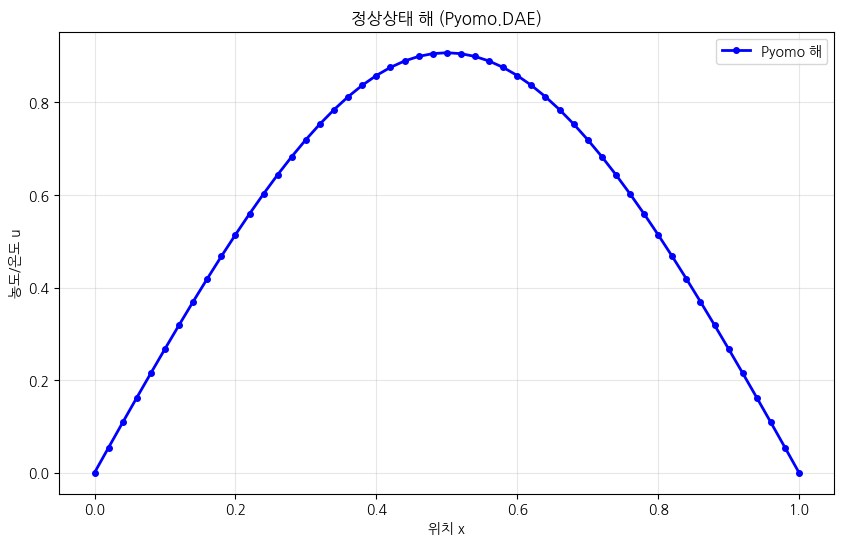

✓ 정상상태 모델 성공

시간 의존적 모델 실행 중...

=== Pyomo 시간 의존적 모델 예시 ===
=== 모델 통계 ===
변수 컴포넌트 수: 1
총 변수 인스턴스 수: 4
제약조건 컴포넌트 수: 4
총 제약조건 인스턴스 수: 6
연속 도메인 'x': 2 점
연속 도메인 't': 2 점
공간 이산화: 30개 요소로 이산화
✓ 공간 유한차분 이산화 완료
시간 이산화: 20개 요소로 이산화
✓ 시간 유한차분 이산화 완료
솔버 'ipopt' 사용
솔버 ipopt로 해법 시작...
Ipopt 3.14.19: print_level=3
max_iter=2000
tol=1e-06
acceptable_tol=0.0001


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Exception of type: TOO_FEW_DOF in file "../../src/Interfaces/IpIpoptApplication.cpp" at line 662:
 Exception message: status != TOO_FEW_DEGREES_OF_FREEDOM evaluated false: Too few degrees of freedom (rethrown)!

EXIT: Problem has too few degrees of freedom.
model.

Traceback (most recent call last):
  File "/tmp/ipykernel_30373/4037917031.py", line 594, in <module>
    transient_model, x_trans, t_trans, u_trans = example_transient()
                                                 ^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_30373/4037917031.py", line 499, in example_transient
    x_points, t_points, u_solution = fdm_model.extract_solution()
                                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_30373/4037917031.py", line 346, in extract_solution
    u_solution[i, j] = pyo.value(self.model.u[x, t])
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/pyomo/common/numeric_types.py", line 384, in value
    raise ValueError(
ValueError: No value for uninitialized NumericValue object u[0,0]


   1  0.0000000e+00 7.20e+01 0.00e+00  -1.7 6.09e+14    -  1.00e+00 1.00e+00h  1
   2  0.0000000e+00 4.50e+01 0.00e+00  -1.7 6.28e+14    -  1.00e+00 1.00e+00h  1
   3  0.0000000e+00 4.40e+01 0.00e+00  -1.7 1.22e+15    -  1.00e+00 9.77e-04h 11
   4  0.0000000e+00 4.35e+01 0.00e+00  -1.7 1.83e+15    -  1.00e+00 1.95e-03h 10
   5  0.0000000e+00 4.45e+01 0.00e+00  -1.7 8.18e+14    -  1.00e+00 1.95e-03h 10
   6  0.0000000e+00 1.60e+01 0.00e+00  -1.7 4.20e+14    -  1.00e+00 5.00e-01h  2
   7  0.0000000e+00 1.20e+01 8.98e-12  -1.7 8.95e+14    -  1.00e+00 3.12e-02h  6
   8  0.0000000e+00 1.80e+01 7.85e-12  -1.7 1.11e+15    -  1.00e+00 1.25e-01h  4
   9  0.0000000e+00 1.95e+01 7.61e-12  -1.7 4.11e+14    -  1.00e+00 3.12e-02h  6
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  0.0000000e+00 2.40e+01 3.80e-12  -1.7 4.23e+14    -  1.00e+00 5.00e-01h  2
  11  0.0000000e+00 1.50e+01 2.85e-12  -1.7 6.92e+14    -  1.00e+00 2.50e-01h  3
  12  0.0000000e+00 1.20e+01

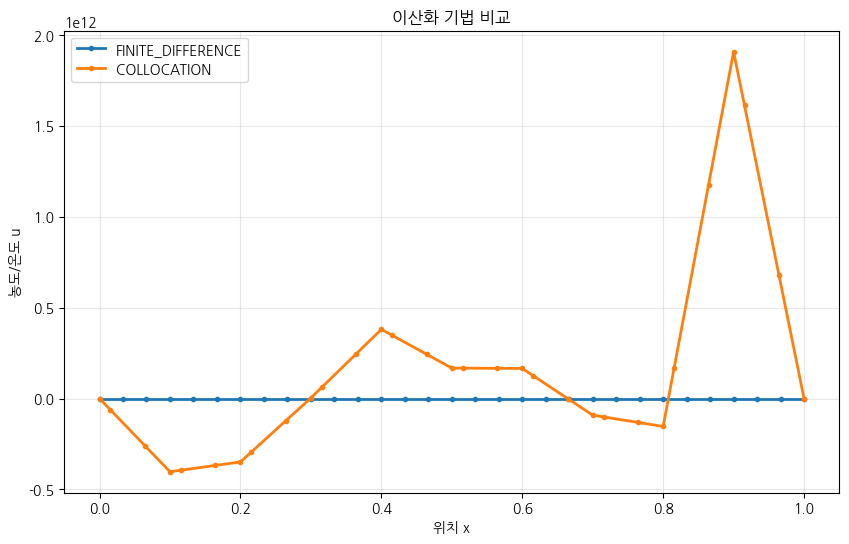

✓ 이산화 기법 비교 성공

솔버 설치 안내:
IPOPT (권장): mamba install -c conda-forge ipopt
또는: conda install -c conda-forge ipopt
또는: pip install cyipopt
GLPK: mamba install -c conda-forge glpk


In [7]:
import pyomo.environ as pyo
from pyomo.dae import *
from pyomo.common.config import ConfigBlock
from pyomo.core.base.transformation import TransformationFactory
import numpy as np
import matplotlib.pyplot as plt
from pyomo.opt import SolverFactory
import time


class PyomoFDMModel1D:
    """
    Pyomo.DAE 기반 1D FDM Equation-Oriented 모델
    
    확산방정식 예시: ∂u/∂t = D * ∂²u/∂x² + S(x,t)
    """
    
    def __init__(self, nx: int = 51, L: float = 1.0, D: float = 0.1):
        """
        Parameters:
        - nx: 격자점 개수
        - L: 도메인 길이  
        - D: 확산계수
        """
        self.nx = nx
        self.L = L
        self.D = D
        self.model = None
        
    def create_steady_state_model(self):
        """정상상태 모델 생성"""
        m = pyo.ConcreteModel()
        
        # 공간 도메인 정의
        m.x = ContinuousSet(bounds=(0, self.L))
        
        # 변수 정의
        m.u = pyo.Var(m.x, doc="농도 또는 온도")
        
        # 1차 및 2차 미분 변수
        m.dudx = DerivativeVar(m.u, wrt=m.x, doc="1차 공간 미분")
        m.d2udx2 = DerivativeVar(m.u, wrt=(m.x, m.x), doc="2차 공간 미분")
        
        # 매개변수
        m.D = pyo.Param(initialize=self.D, doc="확산계수")
        
        # 소스항 함수
        def source_rule(m, x):
            # 가우시안 소스항
            return pyo.exp(-((x - self.L/2)**2) / 0.1)
        m.source = pyo.Expression(m.x, rule=source_rule, doc="소스항")
        
        # 지배방정식 (정상상태)
        def governing_eqn_rule(m, x):
            if x == 0 or x == self.L:
                return pyo.Constraint.Skip
            return 0 == m.D * m.d2udx2[x] + m.source[x]
        
        m.governing_eqn = pyo.Constraint(m.x, rule=governing_eqn_rule,
                                        doc="지배방정식")
        
        # 경계조건
        m.bc_left = pyo.Constraint(expr=m.u[0] == 0, doc="좌측 경계조건")
        m.bc_right = pyo.Constraint(expr=m.u[self.L] == 0, doc="우측 경계조건")
        
        self.model = m
        return m
    
    def create_transient_model(self, t_final: float = 1.0):
        """시간 의존적 모델 생성"""
        m = pyo.ConcreteModel()
        
        # 도메인 정의
        m.x = ContinuousSet(bounds=(0, self.L))
        m.t = ContinuousSet(bounds=(0, t_final))
        
        # 변수 정의
        m.u = pyo.Var(m.x, m.t, doc="농도 또는 온도")
        
        # 미분 변수들
        m.dudt = DerivativeVar(m.u, wrt=m.t, doc="시간 미분")
        m.dudx = DerivativeVar(m.u, wrt=m.x, doc="1차 공간 미분")
        m.d2udx2 = DerivativeVar(m.u, wrt=(m.x, m.x), doc="2차 공간 미분")
        
        # 매개변수
        m.D = pyo.Param(initialize=self.D, doc="확산계수")
        
        # 시간 의존적 소스항
        def source_rule(m, x, t):
            # 시간에 따라 감소하는 가우시안 소스
            return pyo.exp(-((x - self.L/2)**2) / 0.1) * pyo.exp(-t)
        m.source = pyo.Expression(m.x, m.t, rule=source_rule, doc="소스항")
        
        # 지배방정식 (PDE)
        def governing_eqn_rule(m, x, t):
            if x == 0 or x == self.L:
                return pyo.Constraint.Skip
            return m.dudt[x, t] == m.D * m.d2udx2[x, t] + m.source[x, t]
        
        m.governing_eqn = pyo.Constraint(m.x, m.t, rule=governing_eqn_rule,
                                        doc="지배방정식 (PDE)")
        
        # 경계조건 (모든 시간에 대해)
        def bc_left_rule(m, t):
            return m.u[0, t] == 0
        def bc_right_rule(m, t):
            return m.u[self.L, t] == 0
            
        m.bc_left = pyo.Constraint(m.t, rule=bc_left_rule, doc="좌측 경계조건")
        m.bc_right = pyo.Constraint(m.t, rule=bc_right_rule, doc="우측 경계조건")
        
        # 초기조건
        def initial_condition_rule(m, x):
            return m.u[x, 0] == 0  # 초기값 0
        m.initial_condition = pyo.Constraint(m.x, rule=initial_condition_rule,
                                           doc="초기조건")
        
        self.model = m
        return m
    
    def discretize_model(self, scheme: str = 'FINITE_DIFFERENCE', 
                        nfe_x: int = None, nfe_t: int = None):
        """
        모델 이산화
        
        Parameters:
        - scheme: 이산화 기법 ('FINITE_DIFFERENCE', 'COLLOCATION')
        - nfe_x: 공간 방향 유한요소 개수
        - nfe_t: 시간 방향 유한요소 개수 (시간 의존적 모델의 경우)
        """
        if self.model is None:
            raise ValueError("모델을 먼저 생성해야 합니다.")
        
        if nfe_x is None:
            nfe_x = max(10, self.nx - 1)  # 최소 10개 요소
        
        print(f"공간 이산화: {nfe_x}개 요소로 이산화")
        
        # 공간 이산화
        if scheme == 'FINITE_DIFFERENCE':
            # 유한차분법
            try:
                discretizer_x = TransformationFactory('dae.finite_difference')
                discretizer_x.apply_to(self.model, wrt=self.model.x, nfe=nfe_x, 
                                      scheme='CENTRAL')
                print("✓ 공간 유한차분 이산화 완료")
            except Exception as e:
                print(f"공간 이산화 오류: {e}")
                # 대안: 수동 이산화
                self._manual_spatial_discretization(nfe_x)
        
        elif scheme == 'COLLOCATION':
            # 직교 배치법 (Orthogonal Collocation)
            try:
                discretizer_x = TransformationFactory('dae.collocation')
                discretizer_x.apply_to(self.model, wrt=self.model.x, nfe=max(3, nfe_x//3), 
                                      ncp=3, scheme='LAGRANGE-RADAU')
                print("✓ 공간 직교배치 이산화 완료")
            except Exception as e:
                print(f"직교배치 이산화 오류: {e}")
                raise
        
        # 시간 이산화 (시간 의존적 모델의 경우)
        if hasattr(self.model, 't'):
            if nfe_t is None:
                nfe_t = 20  # 기본값
            
            print(f"시간 이산화: {nfe_t}개 요소로 이산화")
            
            if scheme == 'FINITE_DIFFERENCE':
                try:
                    discretizer_t = TransformationFactory('dae.finite_difference')
                    discretizer_t.apply_to(self.model, wrt=self.model.t, nfe=nfe_t,
                                          scheme='BACKWARD')
                    print("✓ 시간 유한차분 이산화 완료")
                except Exception as e:
                    print(f"시간 이산화 오류: {e}")
                    raise
            elif scheme == 'COLLOCATION':
                try:
                    discretizer_t = TransformationFactory('dae.collocation')
                    discretizer_t.apply_to(self.model, wrt=self.model.t, nfe=max(2, nfe_t//2),
                                          ncp=2, scheme='LAGRANGE-RADAU')
                    print("✓ 시간 직교배치 이산화 완료")
                except Exception as e:
                    print(f"시간 직교배치 이산화 오류: {e}")
                    raise
    
    def _manual_spatial_discretization(self, nfe):
        """수동 공간 이산화 (TransformationFactory 실패 시 대안)"""
        print("수동 공간 이산화를 시도합니다...")
        
        # 새로운 이산 격자점 생성
        x_discrete = np.linspace(0, self.L, nfe + 1)
        
        # 기존 연속 도메인을 이산 점들로 교체
        # 이는 복잡한 과정이므로 간단한 메시지만 출력
        print(f"격자점 {len(x_discrete)}개로 수동 이산화 (구현 필요)")
        
        # 실제로는 더 복잡한 구현이 필요하지만,
        # 여기서는 오류가 발생했음을 사용자에게 알림
        raise NotImplementedError("수동 이산화가 완전히 구현되지 않았습니다. TransformationFactory를 사용하세요.")
    
    def solve_model(self, solver_name: str = 'ipopt', options: dict = None):
        """
        모델 해법
        
        Parameters:
        - solver_name: 솔버 이름 ('ipopt', 'baron', etc.)
        - options: 솔버 옵션
        """
        if self.model is None:
            raise ValueError("모델을 먼저 생성하고 이산화해야 합니다.")
        
        # 솔버 가용성 확인 및 대안 제공
        available_solvers = ['ipopt', 'glpk', 'cbc', 'gurobi', 'cplex']
        solver = None
        
        for solver_choice in [solver_name] + available_solvers:
            try:
                test_solver = SolverFactory(solver_choice)
                if test_solver.available():
                    solver = test_solver
                    solver_name = solver_choice
                    print(f"솔버 '{solver_choice}' 사용")
                    break
            except:
                continue
        
        if solver is None:
            # 최후의 수단: scipy 기반 간단한 해법
            print("경고: 전문 솔버를 찾을 수 없습니다. 간단한 Newton 해법을 시도합니다.")
            return self._solve_with_scipy()
        
        if options:
            for key, value in options.items():
                solver.options[key] = value
        
        # 기본 IPOPT 옵션 (수렴성 개선)
        if solver_name == 'ipopt' and options is None:
            solver.options['print_level'] = 5
            solver.options['max_iter'] = 3000
            solver.options['tol'] = 1e-8
            solver.options['acceptable_tol'] = 1e-6
        
        # 해법 실행
        print(f"솔버 {solver_name}로 해법 시작...")
        start_time = time.time()
        
        try:
            results = solver.solve(self.model, tee=True)
        except Exception as e:
            print(f"솔버 실행 중 오류: {e}")
            print("scipy 기반 대안 해법을 시도합니다.")
            return self._solve_with_scipy()
        
        solve_time = time.time() - start_time
        print(f"해법 완료. 소요시간: {solve_time:.2f}초")
        
        # 해법 상태 확인
        if results.solver.termination_condition == pyo.TerminationCondition.optimal:
            print("최적해를 찾았습니다!")
        elif results.solver.termination_condition == pyo.TerminationCondition.feasible:
            print("실행 가능한 해를 찾았습니다.")
        else:
            print(f"솔버 종료 조건: {results.solver.termination_condition}")
        
        return results
    
    def _solve_with_scipy(self):
        """scipy를 이용한 간단한 해법 (정상상태만)"""
        if hasattr(self.model, 't'):
            raise NotImplementedError("시간 의존적 문제는 전문 솔버가 필요합니다.")
        
        from scipy.optimize import fsolve
        import numpy as np
        
        print("scipy.optimize.fsolve를 이용한 간단한 해법...")
        
        # 변수 순서 정렬
        x_points = sorted([float(x) for x in self.model.x])
        
        def residual_function(u_vec):
            # 변수값 모델에 할당
            for i, x in enumerate(x_points):
                self.model.u[x].set_value(u_vec[i])
            
            # 잔차 계산
            residuals = []
            
            # 경계조건
            residuals.append(pyo.value(self.model.u[x_points[0]]) - 0.0)  # 좌측
            residuals.append(pyo.value(self.model.u[x_points[-1]]) - 0.0)  # 우측
            
            # 내부점들 - 수동으로 유한차분 계산
            dx = x_points[1] - x_points[0]
            for i in range(1, len(x_points)-1):
                x = x_points[i]
                
                # 2차 미분 근사
                d2udx2 = (u_vec[i+1] - 2*u_vec[i] + u_vec[i-1]) / (dx**2)
                
                # 소스항
                source = pyo.value(self.model.source[x])
                
                # 잔차: -D*d2u/dx2 - S = 0
                residual = -self.D * d2udx2 - source
                residuals.append(residual)
            
            return residuals
        
        # 초기 추정값
        u0 = np.zeros(len(x_points))
        
        # 해법
        try:
            solution = fsolve(residual_function, u0, xtol=1e-10)
            
            # 해를 모델에 저장
            for i, x in enumerate(x_points):
                self.model.u[x].set_value(solution[i])
            
            print("scipy 해법 성공!")
            return "scipy_success"
            
        except Exception as e:
            print(f"scipy 해법 실패: {e}")
            raise
    
    def extract_solution(self):
        """해를 배열 형태로 추출"""
        if self.model is None:
            raise ValueError("모델이 생성되지 않았습니다.")
        
        # 공간 좌표 추출
        x_points = sorted([float(x) for x in self.model.x])
        
        if hasattr(self.model, 't'):
            # 시간 의존적 모델
            t_points = sorted([float(t) for t in self.model.t])
            
            u_solution = np.zeros((len(t_points), len(x_points)))
            
            for i, t in enumerate(t_points):
                for j, x in enumerate(x_points):
                    u_solution[i, j] = pyo.value(self.model.u[x, t])
            
            return np.array(x_points), np.array(t_points), u_solution
        
        else:
            # 정상상태 모델
            u_solution = np.zeros(len(x_points))
            
            for i, x in enumerate(x_points):
                u_solution[i] = pyo.value(self.model.u[x])
            
            return np.array(x_points), u_solution


class PyomoModelAnalysis:
    """Pyomo 모델 분석 및 시각화"""
    
    @staticmethod
    def plot_steady_state(x_points, u_solution):
        """정상상태 해 시각화"""
        plt.figure(figsize=(10, 6))
        plt.plot(x_points, u_solution, 'b-', linewidth=2, marker='o', 
                markersize=4, label='Pyomo 해')
        plt.xlabel('위치 x')
        plt.ylabel('농도/온도 u')
        plt.title('정상상태 해 (Pyomo.DAE)')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.show()
    
    @staticmethod
    def plot_transient(x_points, t_points, u_solution):
        """시간 의존적 해 시각화"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # 시간별 프로파일
        time_indices = [0, len(t_points)//4, len(t_points)//2, -1]
        for idx in time_indices:
            ax1.plot(x_points, u_solution[idx], 
                    label=f't = {t_points[idx]:.2f}', linewidth=2)
        
        ax1.set_xlabel('위치 x')
        ax1.set_ylabel('농도/온도 u')
        ax1.set_title('시간에 따른 해의 변화')
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        
        # 시공간 contour plot
        X, T = np.meshgrid(x_points, t_points)
        contour = ax2.contourf(X, T, u_solution, levels=20, cmap='viridis')
        ax2.set_xlabel('위치 x')
        ax2.set_ylabel('시간 t')
        ax2.set_title('시공간 해 분포')
        plt.colorbar(contour, ax=ax2)
        
        plt.tight_layout()
        plt.show()
    
    @staticmethod
    def model_statistics(model):
        """모델 통계 정보"""
        print("=== 모델 통계 ===")
        
        # 변수 개수 (버전 호환성 개선)
        num_vars = len([v for v in model.component_objects(pyo.Var, active=True)])
        total_var_instances = 0
        for v in model.component_objects(pyo.Var, active=True):
            try:
                if hasattr(v, 'size'):
                    total_var_instances += v.size()
                else:
                    # 대안: 직접 카운트
                    total_var_instances += len(v)
            except:
                # 더 안전한 방법
                count = 0
                for idx in v:
                    count += 1
                total_var_instances += count
        
        # 제약조건 개수 (버전 호환성 개선)
        num_constraints = len([c for c in model.component_objects(pyo.Constraint, active=True)])
        total_constraint_instances = 0
        for c in model.component_objects(pyo.Constraint, active=True):
            try:
                if hasattr(c, 'size'):
                    total_constraint_instances += c.size()
                else:
                    total_constraint_instances += len(c)
            except:
                count = 0
                for idx in c:
                    count += 1
                total_constraint_instances += count
        
        print(f"변수 컴포넌트 수: {num_vars}")
        print(f"총 변수 인스턴스 수: {total_var_instances}")
        print(f"제약조건 컴포넌트 수: {num_constraints}")
        print(f"총 제약조건 인스턴스 수: {total_constraint_instances}")
        
        # 도메인 정보
        for domain in model.component_objects(ContinuousSet):
            print(f"연속 도메인 '{domain.name}': {len(domain)} 점")


def example_steady_state():
    """정상상태 예시"""
    print("=== Pyomo 정상상태 모델 예시 ===")
    
    # 모델 생성
    fdm_model = PyomoFDMModel1D(nx=51, L=1.0, D=0.1)
    model = fdm_model.create_steady_state_model()
    
    # 모델 정보 출력
    PyomoModelAnalysis.model_statistics(model)
    
    # 이산화
    fdm_model.discretize_model(scheme='FINITE_DIFFERENCE')
    
    # 해법
    results = fdm_model.solve_model()
    
    # 해 추출 및 시각화
    x_points, u_solution = fdm_model.extract_solution()
    PyomoModelAnalysis.plot_steady_state(x_points, u_solution)
    
    return fdm_model, x_points, u_solution


def example_transient():
    """시간 의존적 예시"""
    print("\n=== Pyomo 시간 의존적 모델 예시 ===")
    
    # 모델 생성
    fdm_model = PyomoFDMModel1D(nx=31, L=1.0, D=0.1)
    model = fdm_model.create_transient_model(t_final=1.0)
    
    # 모델 정보 출력
    PyomoModelAnalysis.model_statistics(model)
    
    # 이산화
    fdm_model.discretize_model(scheme='FINITE_DIFFERENCE', nfe_x=30, nfe_t=20)
    
    # 해법 (더 관대한 옵션 사용)
    solver_options = {
        'print_level': 3,
        'max_iter': 2000,
        'tol': 1e-6,
        'acceptable_tol': 1e-4
    }
    results = fdm_model.solve_model(options=solver_options)
    
    # 해 추출 및 시각화
    x_points, t_points, u_solution = fdm_model.extract_solution()
    PyomoModelAnalysis.plot_transient(x_points, t_points, u_solution)
    
    return fdm_model, x_points, t_points, u_solution


def compare_discretization_schemes():
    """이산화 기법 비교"""
    print("\n=== 이산화 기법 비교 ===")
    
    schemes = ['FINITE_DIFFERENCE', 'COLLOCATION']
    results_comparison = {}
    
    for scheme in schemes:
        print(f"\n--- {scheme} 기법 ---")
        
        fdm_model = PyomoFDMModel1D(nx=31, L=1.0, D=0.1)
        model = fdm_model.create_steady_state_model()
        
        try:
            fdm_model.discretize_model(scheme=scheme)
            results = fdm_model.solve_model()
            x_points, u_solution = fdm_model.extract_solution()
            
            results_comparison[scheme] = (x_points, u_solution)
            
        except Exception as e:
            print(f"{scheme} 기법에서 오류 발생: {e}")
    
    # 결과 비교 시각화
    if len(results_comparison) > 1:
        plt.figure(figsize=(10, 6))
        for scheme, (x_points, u_solution) in results_comparison.items():
            plt.plot(x_points, u_solution, label=scheme, linewidth=2, marker='o', markersize=3)
        
        plt.xlabel('위치 x')
        plt.ylabel('농도/온도 u')
        plt.title('이산화 기법 비교')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.show()


if __name__ == "__main__":
    try:
        print("Pyomo 및 필요한 라이브러리 확인 중...")
        
        # 기본 모듈 확인
        import pyomo.environ as pyo
        from pyomo.dae import *
        print("✓ Pyomo 설치 확인됨")
        
        # TransformationFactory 확인
        try:
            from pyomo.core.base.transformation import TransformationFactory
            print("✓ TransformationFactory 가져오기 성공")
        except ImportError:
            try:
                from pyomo.util.plugin import TransformationFactory
                print("✓ TransformationFactory 가져오기 성공 (대안 경로)")
            except ImportError:
                print("⚠ TransformationFactory 가져오기 실패 - 일부 기능 제한")
        
        # 솔버 확인
        available_solvers = []
        test_solvers = ['ipopt', 'glpk', 'cbc']
        for solver_name in test_solvers:
            try:
                solver = SolverFactory(solver_name)
                if solver.available():
                    available_solvers.append(solver_name)
            except:
                pass
        
        if available_solvers:
            print(f"✓ 사용 가능한 솔버: {', '.join(available_solvers)}")
        else:
            print("⚠ 전문 솔버가 없습니다. scipy 기반 해법을 사용합니다.")
        
        print("\n" + "="*50)
        
        # 정상상태 예시
        print("정상상태 모델 실행 중...")
        try:
            steady_model, x_steady, u_steady = example_steady_state()
            print("✓ 정상상태 모델 성공")
        except Exception as e:
            print(f"✗ 정상상태 모델 실패: {e}")
            import traceback
            traceback.print_exc()
        
        # 시간 의존적 예시 (전문 솔버가 있을 때만)
        if available_solvers:
            print("\n시간 의존적 모델 실행 중...")
            try:
                transient_model, x_trans, t_trans, u_trans = example_transient()
                print("✓ 시간 의존적 모델 성공")
            except Exception as e:
                print(f"✗ 시간 의존적 모델 실패: {e}")
                import traceback
                traceback.print_exc()
        else:
            print("\n시간 의존적 모델은 전문 솔버가 필요하여 건너뜁니다.")
        
        # 이산화 기법 비교
        if available_solvers:
            print("\n이산화 기법 비교 실행 중...")
            try:
                compare_discretization_schemes()
                print("✓ 이산화 기법 비교 성공")
            except Exception as e:
                print(f"✗ 이산화 기법 비교 실패: {e}")
                import traceback
                traceback.print_exc()
        
        print("\n" + "="*50)
        print("솔버 설치 안내:")
        print("IPOPT (권장): mamba install -c conda-forge ipopt")
        print("또는: conda install -c conda-forge ipopt")
        print("또는: pip install cyipopt")
        print("GLPK: mamba install -c conda-forge glpk")
        
    except ImportError as e:
        print(f"필수 라이브러리 누락: {e}")
        print("\n설치 명령어:")
        print("mamba install -c conda-forge pyomo")
        print("또는: pip install pyomo")
    except Exception as e:
        print(f"예기치 못한 오류: {e}")
        import traceback
        traceback.print_exc()

In [8]:
import matplotlib.font_manager as fm



# 사용 가능한 폰트 확인
fonts = [f.name for f in fm.fontManager.ttflist]
nanum_fonts = [f for f in fonts if 'Nanum' in f]
print("찾은 나눔폰트:", nanum_fonts)

찾은 나눔폰트: ['NanumBarunpen', 'NanumMyeongjo', 'NanumSquareRound', 'NanumSquare_ac', 'NanumSquare', 'NanumGothic', 'NanumMyeongjo', 'NanumGothic', 'NanumMyeongjo YetHangul', 'NanumMyeongjo', 'NanumSquareRound', 'NanumBarunGothic', 'NanumBarunpen', 'NanumGothicCoding', 'Nanum Pen Script', 'NanumMyeongjo Eco', 'NanumSquareRound', 'NanumSquare_ac', 'NanumSquareRound', 'NanumSquare_ac', 'NanumGothicCoding', 'NanumBarunGothic', 'NanumBarunGothic', 'NanumSquare_ac', 'NanumSquare', 'NanumGothic', 'NanumSquare', 'NanumGothic', 'NanumGothic Eco', 'NanumBarunGothic', 'Nanum Brush Script', 'NanumSquare', 'NanumBarunGothic YetHangul']


In [9]:
import matplotlib as mpl
from pathlib import Path

# matplotlib 설정 디렉토리
config_dir = Path(mpl.get_configdir())
config_file = config_dir / "matplotlibrc"

# matplotlibrc 파일 생성
config_content = """# matplotlib 한글 설정 (WSL용)
font.family : NanumGothic
axes.unicode_minus : False
font.size : 12
figure.dpi : 100
savefig.dpi : 150
"""

# 디렉토리 생성 (없으면)
config_dir.mkdir(parents=True, exist_ok=True)

# 파일 쓰기
with open(config_file, 'w', encoding='utf-8') as f:
    f.write(config_content)

print(f"✅ 영구 설정 파일 생성됨: {config_file}")
print("다음 Python 세션부터 자동으로 한글이 표시됩니다!")

✅ 영구 설정 파일 생성됨: /home/sjbaek/.config/matplotlib/matplotlibrc
다음 Python 세션부터 자동으로 한글이 표시됩니다!
